# Introduction to Altair

[Altair](https://altair-viz.github.io/) is a declarative statistical visualization library for Python. Altair offers a powerful and concise visualization grammar for quickly building a wide range of statistical graphics.

By *declarative*, we mean that you can provide a high-level specification of *what* you want the visualization to include, in terms of *data*, *graphical marks*, and *encoding channels*, rather than having to specify *how* to implement the visualization in terms of for-loops, low-level drawing commands, *etc*. The key idea is that you declare links between data fields and visual encoding channels, such as the x-axis, y-axis, color, *etc*. The rest of the plot details are handled automatically. Building on this declarative plotting idea, a surprising range of simple to sophisticated visualizations can be created using a concise grammar.

## Imports

To start, we must import the necessary libraries: Pandas for data frames and Altair for visualization.

In [1]:
import pandas as pd
import altair as alt
# use this line if you are in a Jupyter Notebook (not JupyterLab) environment
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

### Weather Data

Statistical visualization in Altair begins with ["tidy"](http://vita.had.co.nz/papers/tidy-data.html) data frames. Here, we'll start by creating a simple data frame (`df`) containing the average precipitation (`precip`) for a given `city` and `month` :

In [2]:
df = pd.DataFrame({
    'city': ['Seattle', 'Seattle', 'Seattle', 'New York', 'New York', 'New York', 'Chicago', 'Chicago', 'Chicago'],
    'month': ['Apr', 'Aug', 'Dec', 'Apr', 'Aug', 'Dec', 'Apr', 'Aug', 'Dec'],
    'precip': [2.68, 0.87, 5.31, 3.94, 4.13, 3.58, 3.62, 3.98, 2.56]
})

df

,city,month,precip
0,Seattle,Apr,2.68
1,Seattle,Aug,0.87
2,Seattle,Dec,5.31
3,New York,Apr,3.94
4,New York,Aug,4.13
5,New York,Dec,3.58
6,Chicago,Apr,3.62
7,Chicago,Aug,3.98
8,Chicago,Dec,2.56


## The Chart Object

The fundamental object in Altair is the `Chart`, which takes a data frame as a single argument:

In [3]:
chart = alt.Chart(df)

So far, we have defined the `Chart` object and passed it the simple data frame we generated above. We have not yet told the chart to *do* anything with the data.

## Marks and Encodings

With a chart object in hand, we can now specify how we would like the data to be visualized. We first indicate what kind of graphical *mark* (geometric shape) we want to use to represent the data. We can set the `mark` attribute of the chart object using the the `Chart.mark_*` methods.

For example, we can show the data as a point using `Chart.mark_point()`:

In [4]:
alt.Chart(df).mark_point()

Here the rendering consists of one point per row in the dataset, all plotted on top of each other, since we have not yet specified positions for these points.

To visually separate the points, we can map various *encoding channels*, or *channels* for short, to fields in the dataset. For example, we could *encode* the field `city` of the data using the `y` channel, which represents the y-axis position of the points. To specify this, use the `encode` method:


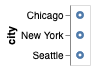

In [5]:
alt.Chart(df).mark_point().encode(
  y='city',
)

The `encode()` method builds a key-value mapping between encoding channels (such as `x`, `y`, `color`, `shape`, `size`, *etc.*) to fields in the dataset, accessed by field name. For Pandas data frames, Altair automatically determines an appropriate data type for the mapped column, which in this case is the *nominal* type, indicating unordered, categorical values.

Though we've now separated the data by one attribute, we still have multiple points overlapping within each category. Let's further separate these by adding an `x` encoding channel, mapped to the `'precip'` field:

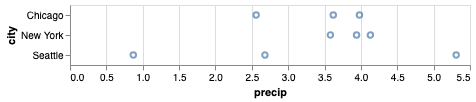

In [6]:
alt.Chart(df).mark_point().encode(
    x='precip',
    y='city'
)

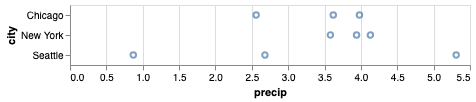

In [7]:
alt.Chart(df).mark_point().encode(
    alt.X('precip'),
    alt.Y('city')
)

The two styles of specifying encodings can be interleaved: `x='precip', alt.Y('city')` is also a valid input to the `encode` function.

In the examples above, the data type for each field is inferred automatically based on its type within the Pandas data frame. We can also explicitly indicate the data type to Altair by annotating the field name:

- `'b:N'` indicates a *nominal* type (unordered, categorical data),
- `'b:O'` indicates an *ordinal* type (rank-ordered data),
- `'b:Q'` indicates a *quantitative* type (numerical data with meaningful magnitudes), and
- `'b:T'` indicates a *temporal* type (date/time data)

Explicit annotation of data types is necessary when data is loaded from an external URL directly by Vega-Lite (skipping Pandas entirely), or when we wish to use a type that differs from the type that was automatically inferred.

What do you think will happen to our chart above if we treat `precip` as a nominal or ordinal variable, rather than a quantitative variable? _Modify the code above and find out!_

We will take a closer look at data types and encoding channels in the next notebook.

## Data Transformation: Aggregation

To allow for more flexibility in how data are visualized, Altair has a built-in syntax for *aggregation* of data. For example, we can compute the average of all values by specifying an aggregation function along with the field name:

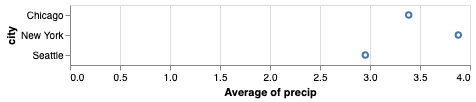

In [8]:
alt.Chart(df).mark_point().encode(
    x='average(precip)',
    y='city'
)

Now within each x-axis category, we see a single point reflecting the *average* of the values within that category.

_Does Seattle really have the lowest average precipitation of these cities? (It does!) Still, how might this plot mislead? Which months are included? What counts as precipitation?_

Altair supports a variety of aggregation functions, including `count`, `min` (minimum), `max` (maximum), `average`, `median`, and `stdev` (standard deviation). In a later notebook, we will take a tour of data transformations, including aggregation, sorting, filtering, and creation of new derived fields using calculation formulas.

## Changing the Mark Type

Let's say we want to represent our aggregated values using rectangular bars rather than circular points. We can do this by replacing `Chart.mark_point` with `Chart.mark_bar`:

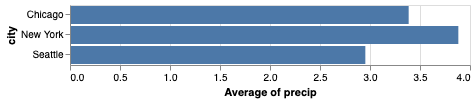

In [9]:
alt.Chart(df).mark_bar().encode(
    x='average(precip)',
    y='city'
)

Because the nominal field `a` is mapped to the `y`-axis, the result is a horizontal bar chart. To get a vertical bar chart, we can simply swap the `x` and `y` keywords:

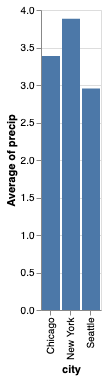

In [10]:
alt.Chart(df).mark_bar().encode(
    x='city',
    y='average(precip)'
)

# Combining charts


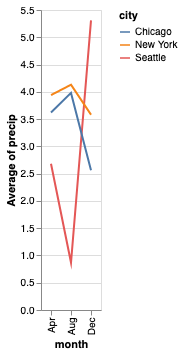

In [28]:
chart1 = alt.Chart(df).mark_line().encode(
    x='month',
    y='average(precip)',
    color='city'
)
chart1

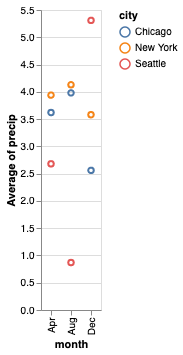

In [16]:
chart2 = alt.Chart(df).mark_point().encode(
    x='month',
    y='average(precip)',
    color='city'
)
chart2

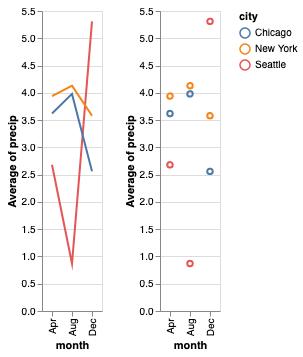

In [17]:
chart3 = chart1 | chart2
chart3

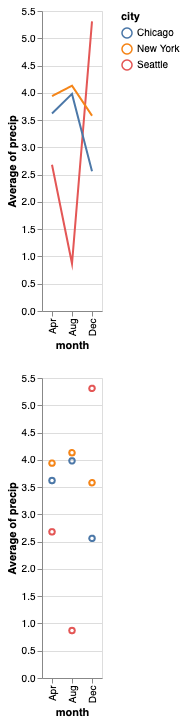

In [20]:
chart4 = chart1 & chart2
chart4

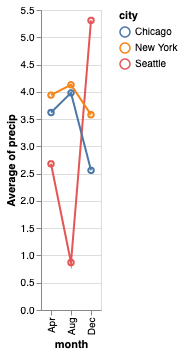

In [21]:
chart5 = chart1 + chart2
chart5

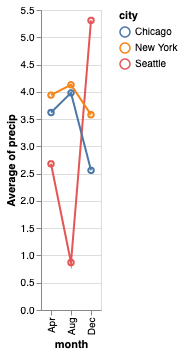

In [22]:
chart5.interactive()

In [26]:
chart5.save('chart.html')